## Result 6: neuron clusters
Investigate the expression of MOD markers in neuronal clusters identified by Moffitt et al. using scRNA-seq data.

In [27]:
from pathlib import Path

import sys
import os
sys.path.append(os.path.abspath("../src"))

import importlib
import utils
import plot

importlib.reload(utils)
importlib.reload(plot)

from utils import load_scRNA_data
from utils import order_neuron_clusters, get_cluster_boundaries
from plot import plot_neuron_cluster_heatmap, CM

import numpy as np
import pandas as pd

In [2]:
fig_path = Path("../data/results/R6/")

### data

#### Matched Single-Cell RNA Sequencing

In [3]:
# Define file paths
single_cell_data_folder_path = Path("../data/mouse_hypothalamus/SingleCell/")
mtx_path = single_cell_data_folder_path / "GSE113576_matrix.mtx"
barcodes_path = single_cell_data_folder_path / "GSE113576_barcodes.tsv"
genes_path = single_cell_data_folder_path / "GSE113576_genes.tsv"
meta_path = single_cell_data_folder_path / "aau5324_Moffitt_Table-S1.xlsx"

In [4]:
cell_class_dict = {
    'Excitatory': 'Excitatory',
    'Inhibitory': 'Inhibitory',
}

adata = load_scRNA_data(
    mtx_path, 
    barcodes_path, 
    genes_path, 
    meta_path, 
    cell_class_filter = cell_class_dict,
    neuron_cluster=True
)

In [5]:
sc_data = adata.to_df()
neuron_cluster = adata.obs["Neuronal_cluster"]
sc_data["Neuronal_cluster"] = neuron_cluster

In [6]:
from natsort import natsorted

clusters = sc_data['Neuronal_cluster'].unique()
sorted_clusters = natsorted(clusters)

sorted_index = []
for cluster in sorted_clusters:
    cells = sc_data.index[sc_data['Neuronal_cluster'] == cluster]
    sorted_index.extend(cells)

sc_data_sorted = sc_data.loc[sorted_index]

#### Marker Genes

differentially expressed genes identified by BANKSY

In [7]:
# all differentially expressed genes
DE_genes = ['Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck', 'Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3']
# DE_genes_MOD2: 7
DE_genes_MOD2 = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3']
# DE_genes_MOD1: 8
DE_genes_MOD1 = ['Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']

In [8]:
Gene_Group = pd.DataFrame([1,1,1,1,1,1,1,1,1,0,0,0,0,0], columns=['cluster'])

In [9]:
# Excitatory
Ex_sc_data = sc_data_sorted[sc_data_sorted['Neuronal_cluster'].str.startswith("e")]
sc_MOD2 = Ex_sc_data.loc[:, [gene for gene in DE_genes_MOD2 if gene in Ex_sc_data.columns]]
sc_MOD1 = Ex_sc_data.loc[:, [gene for gene in DE_genes_MOD1 if gene in Ex_sc_data.columns]]
Ex_DE = pd.concat([sc_MOD1, sc_MOD2], axis=1)

Ex_cluster = Ex_sc_data["Neuronal_cluster"]

In [10]:
Ex_DE.shape

(3304, 14)

In [11]:
# Inhibitory
In_sc_data = sc_data_sorted[sc_data_sorted['Neuronal_cluster'].str.startswith("i")]
sc_MOD2 = In_sc_data.loc[:, [gene for gene in DE_genes_MOD2 if gene in In_sc_data.columns]]
sc_MOD1 = In_sc_data.loc[:, [gene for gene in DE_genes_MOD1 if gene in In_sc_data.columns]]
In_DE = pd.concat([sc_MOD2, sc_MOD1], axis=1)

In_cluster = In_sc_data["Neuronal_cluster"]

In [12]:
In_DE.shape

(14216, 14)

In [13]:
# Hybrid
Hy_sc_data = sc_data_sorted[sc_data_sorted['Neuronal_cluster'].str.startswith("h")]
sc_MOD2 = Hy_sc_data.loc[:, [gene for gene in DE_genes_MOD2 if gene in Hy_sc_data.columns]]
sc_MOD1 = Hy_sc_data.loc[:, [gene for gene in DE_genes_MOD1 if gene in Hy_sc_data.columns]]
Hy_DE = pd.concat([sc_MOD2, sc_MOD1], axis=1)

Hy_cluster = Hy_sc_data["Neuronal_cluster"]


In [14]:
Hy_DE.shape

(498, 14)

In [15]:
del sc_data, sc_data_sorted, sorted_clusters, sorted_index, sc_MOD1, sc_MOD2, adata

### Excitatory

In [16]:
re_Ex_DE, re_Ex_clu = order_neuron_clusters(cluster_data=Ex_DE, cluster_labels=Ex_cluster, gene_groups=Gene_Group, zscore=True)

In [17]:
cluster_info = get_cluster_boundaries(re_Ex_clu)
print(cluster_info)

              cluster  start_idx  end_idx  size
0             e1:Glut          0      530   531
1       e2:Tac1/Fezf1        531      900   370
2      e3:Cartpt/Isl1        901     1168   268
3       e4:Trh/Angpt1       1169     1382   214
4   e5:Adcyap1/Nkx2.1       1383     1591   209
5       e6:Nos1/Trp73       1592     1793   202
6       e7:Reln/C1ql1       1794     1960   167
7         e8:Cck/Ebf3       1961     2124   164
8      e9:Glut/Tcf7l2       2125     2284   160
9      e10:Glut/Meis2       2285     2434   150
10     e11:Glut/Shox2       2435     2567   133
11     e12:Nos1/Foxp2       2568     2693   126
12     e13:Ghrh/C1ql1       2694     2808   115
13      e15:Ucn3/Brs3       2809     2918   110
14     e16:Sst/Cartpt       2919     3009    91
15     e17:Th/Adcyap1       3010     3086    77
16       e19:Ghrh/Trh       3087     3144    58
17            e20:Crh       3145     3193    49
18     e21:Glut/Rxpf3       3194     3238    45
19       e22:Gal/Ucn3       3239     326

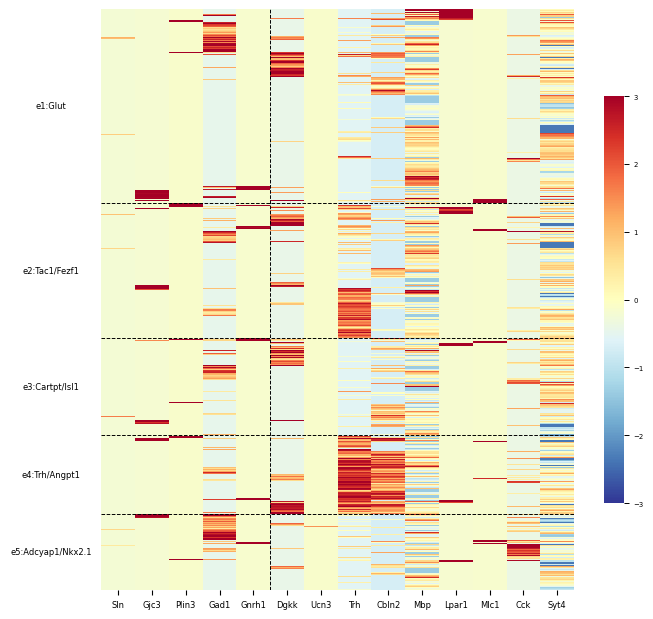

In [28]:
plot_neuron_cluster_heatmap(re_Ex_DE.iloc[:,:1592], re_Ex_clu[:1592], DE_g=True, figures=(18*CM,16*CM), save_fig = fig_path/"ExCluster1.pdf")

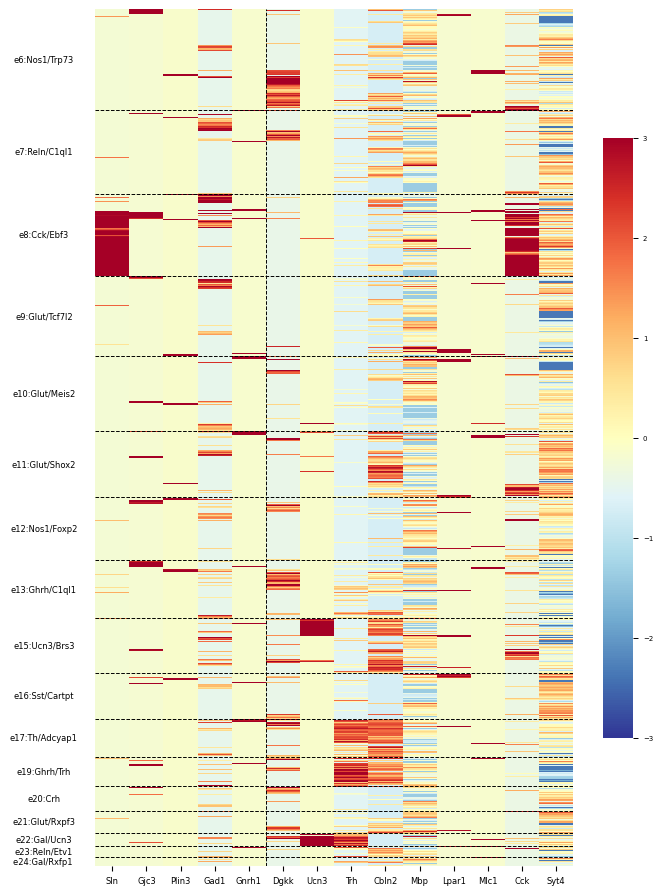

In [33]:
plot_neuron_cluster_heatmap(re_Ex_DE.iloc[:,1592:], re_Ex_clu[1592:], DE_g=True, figures=(18*CM,23*CM), save_fig = fig_path/"ExCluster2.pdf")

### Inhibitory

In [25]:
re_IN_DE, re_IN_clu = order_neuron_clusters(cluster_data=In_DE, cluster_labels=In_cluster, gene_groups=Gene_Group, zscore=True)

In [26]:
cluster_info = get_cluster_boundaries(re_IN_clu)
print(cluster_info)

            cluster  start_idx  end_idx  size
0           i1:Gaba          0     1212  1213
1      i2:Tac1/Pdyn       1213     2268  1056
2       i3:Penk/Nts       2269     3239   971
3      i4:Gaba/Mylk       3240     4104   865
4    i5:Gaba/Pou3f3       4105     4864   760
5        i6:Avp/Nms       4865     5581   717
6           i7:Gaba       5582     6282   701
7     i8:Gal/Amigo2       6283     6979   697
8           i9:Gaba       6980     7574   595
9      i10:Tac1/Nts       7575     8147   573
10         i11:Gaba       8148     8701   554
11         i12:Gaba       8702     9135   434
12         i13:Gaba       9136     9558   423
13      i14:Avp/Cck       9559     9907   349
14         i15:Gaba       9908    10246   339
15       i16:Gal/Th      10247    10586   340
16      i17:Th/Nos1      10587    10907   321
17     i18:Gal/Tac2      10908    11215   308
18    i20:Gal/Moxd1      11216    11509   294
19   i21:Sst/Pou3f3      11510    11780   271
20   i22:Gal/Pmaip1      11781    

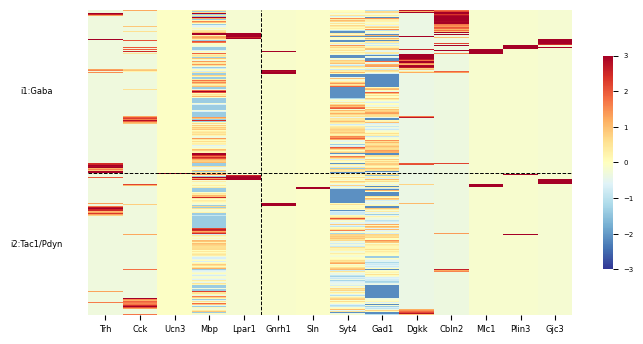

In [34]:
plot_neuron_cluster_heatmap(re_IN_DE.iloc[:,:2269], re_IN_clu[:2269], DE_g=True, figures=(18*CM,9*CM), save_fig = fig_path/"InCluster1.pdf")

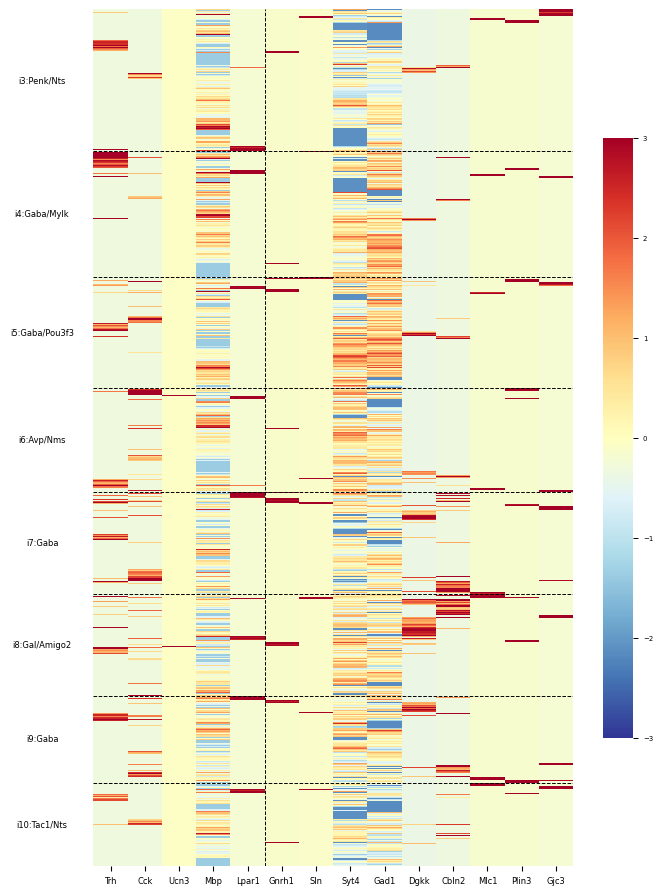

In [36]:
plot_neuron_cluster_heatmap(re_IN_DE.iloc[:,2269:8148], re_IN_clu[2269:8148], DE_g=True, figures=(18*CM,23*CM), save_fig = fig_path/"InCluster2.pdf")

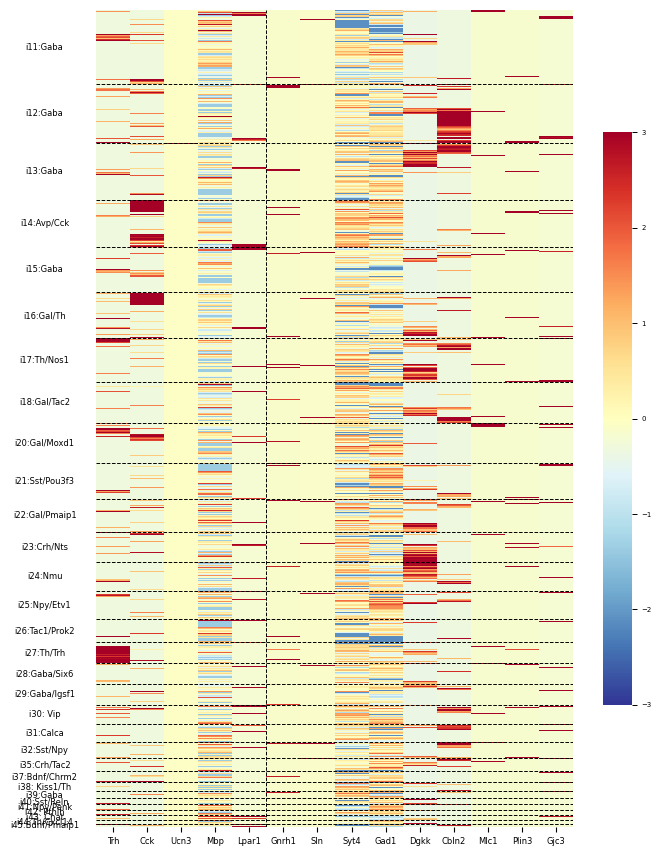

In [37]:
plot_neuron_cluster_heatmap(re_IN_DE.iloc[:,8148:], re_IN_clu[8148:], DE_g=True, figures=(18*CM,22*CM), save_fig = fig_path/"InCluster3.pdf")

### Hybrid

In [39]:
re_Hy_DE, re_Hy_clu = order_neuron_clusters(cluster_data=Hy_DE, cluster_labels=Hy_cluster, gene_groups=Gene_Group, zscore=True)

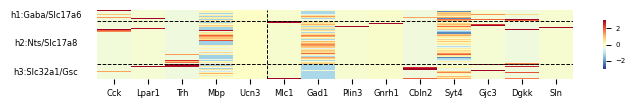

In [40]:
plot_neuron_cluster_heatmap(re_Hy_DE, re_Hy_clu, DE_g=True,  figures=(18*CM,3*CM), save_fig = fig_path/"HyCluster.pdf")